In [1]:
DRAW = True

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 15:40:43.179085: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 15:40:43.255911: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 15:40:43.256848: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 15:40:44.239242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 4)       40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 16)        0

In [6]:
trainer.training_loop()

2023/08/13 15:40:47 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 15:40:47 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/40


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 - 10s - loss: 0.8576 - recall: 0.7276 - binary_accuracy: 0.6289 - precision: 0.6783 - false_negatives: 146.0000 - false_positives: 185.0000 - val_loss: 0.5719 - val_recall: 0.7985 - val_binary_accuracy: 0.7207 - val_precision: 0.7535 - val_false_negatives: 27.0000 - val_false_positives: 35.0000 - 10s/epoch - 171ms/step
Epoch 2/40
56/56 - 5s - loss: 0.5332 - recall: 0.8153 - binary_accuracy: 0.7489 - precision: 0.7776 - false_negatives: 99.0000 - false_positives: 125.0000 - val_loss: 0.5756 - val_recall: 0.9254 - val_binary_accuracy: 0.6847 - val_precision: 0.6739 - val_false_negatives: 10.0000 - val_false_positives: 60.0000 - 5s/epoch - 86ms/step
Epoch 3/40
56/56 - 4s - loss: 0.4749 - recall: 0.8302 - binary_accuracy: 0.7724 - precision: 0.7989 - false_negatives: 91.0000 - false_positives: 112.0000 - val_loss: 0.4792 - val_recall: 0.8060 - val_binary_accuracy: 0.7658 - val_precision: 0.8060 - val_false_negatives: 26.0000 - val_false_positives: 26.0000 - 4s/epoch - 73ms/step
Epoch

2023/08/13 15:44:17 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 15:44:17 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmp8wxnol1l/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp8wxnol1l/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 2s 28ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.9813432835820896, 'fp_Train_acc': 0.9742152466367713, 'fp_Train_precision': 0.9758812615955473}
Confusion matrix Train 
 [[343  13]
 [ 10 526]]
56/56 [==============================] - 2s 30ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (255).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (258).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (264).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (333).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (360).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (432).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (45).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (63).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (73).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (77).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (8).jpeg', 

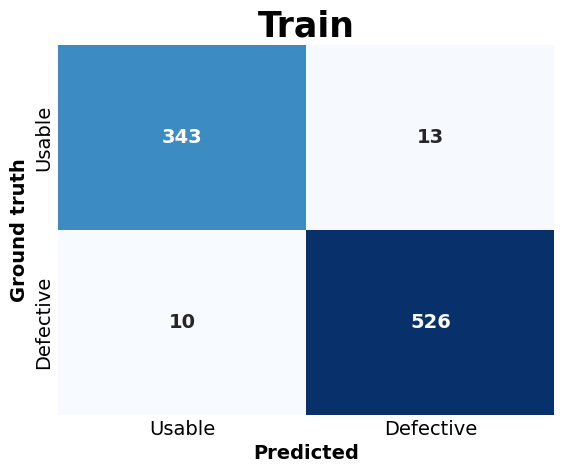

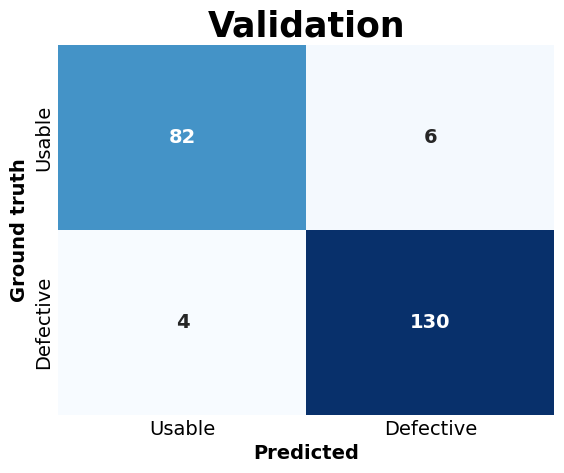

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmpkoa9w1bq/assets


INFO:tensorflow:Assets written to: /tmp/tmpkoa9w1bq/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 15:44:34.311054: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 15:44:34.311086: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 15:44:34.311424: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpkoa9w1bq
2023-08-13 15:44:34.313776: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 15:44:34.313809: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpkoa9w1bq
2023-08-13 15:44:34.321447: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00pt\x00\x00\x80t\x00\x004\x92\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xce\x8a\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\x16\x8c\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00\x8cs\x00\x00\x84s\x00\x00ls\x00\x00Ps\x00\x00@c\x00\x000b\x00\x00 \x1a\x00\x00\x90\x19\x00\x00\x80\x07\x00\x000\x07\x00\x00\xa0\x02\x00\x00p\x02\x00\x00@\x

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

56/56 [==============================] - 2s 39ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': -0.0005057615, 'qt_std': 0.009733261, 'qt_abs_mean': 0.0050632097, 'qt_abs_std': 0.008328028}


{'diff': array([ 9.26944613e-03,  5.58227301e-04, -1.63936913e-02, -1.23769871e-03,
        -3.75697389e-04, -1.74715952e-03,  1.76777132e-03,  2.87782587e-03,
         3.00895423e-03,  1.70821790e-03,  4.24783677e-03, -1.25289103e-03,
         2.95275822e-03,  2.24782899e-03, -2.36222148e-03,  8.34392309e-02,
        -6.04613498e-03,  6.33864105e-03, -2.96247192e-03,  4.91175614e-03,
        -5.22398856e-04, -6.25504181e-03,  2.74685323e-02,  1.80803426e-03,
         1.02501437e-02, -3.92503629e-04,  1.37040205e-03,  1.10509107e-03,
        -2.09364295e-02, -1.97007554e-03, -1.39329135e-02, -1.99304223e-02,
        -1.68596802e-04, -8.90878960e-04,  8.40102881e-03,  9.98526812e-04,
         2.18873192e-03, -2.33977661e-03,  5.85481152e-03, -3.63983214e-04,
         2.20672227e-03, -6.37074001e-04, -4.11085784e-05,  5.84907830e-03,
         6.35976903e-04, -1.92615343e-03, -7.05939194e-04, -1.76609121e-03,
         8.64218920e-03, -1.52858198e-02, -2.59822031e-04,  4.96641248e-02,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.9813432835820896, 'qt_Train_acc': 0.9730941704035875, 'qt_Train_precision': 0.9740740740740741}
Confusion matrix Train 
 [[342  14]
 [ 10 526]]
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (192).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (255).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (258).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (264).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (333).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (360).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (432).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (45).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (63).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (73).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (77).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (8).jpeg', '../dataset/resize_128/train/0_utilizavel/uti

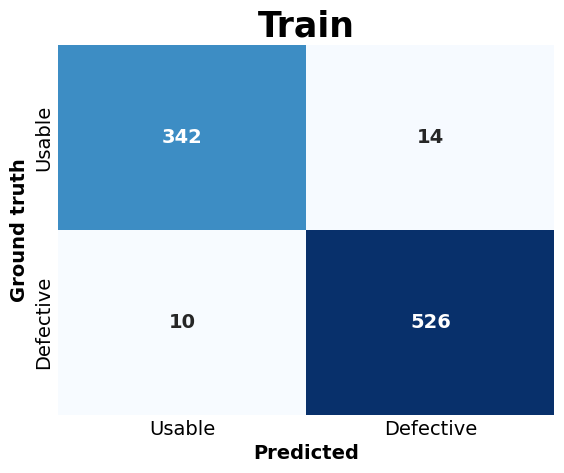

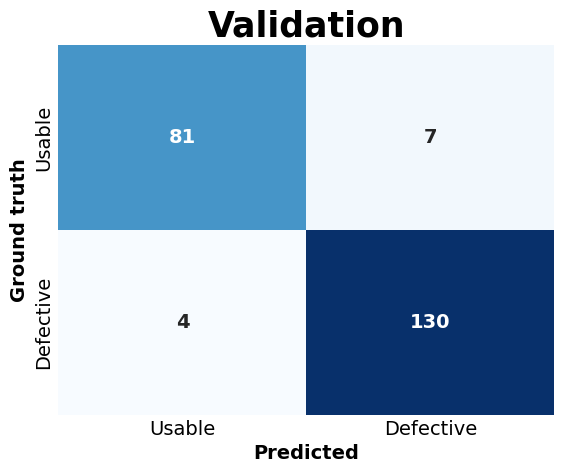

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

12/12 [==============================] - 0s 21ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.9545454545454546, 'fp_Test_acc': 0.9562841530054644, 'fp_Test_precision': 0.9722222222222222}
Confusion matrix Test 
 [[ 70   3]
 [  5 105]]
12/12 [==============================] - 0s 25ms/step
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (493).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (515).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (672).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (696).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (751).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (754).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (776).jpeg']


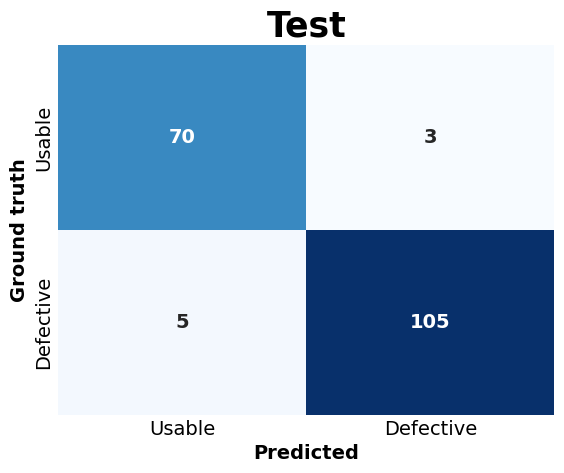

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.9636363636363636, 'qt_Test_acc': 0.9617486338797814, 'qt_Test_precision': 0.9724770642201835}
Confusion matrix Test 
 [[ 70   3]
 [  4 106]]
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (461).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (493).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (515).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (696).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (751).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (754).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (776).jpeg']


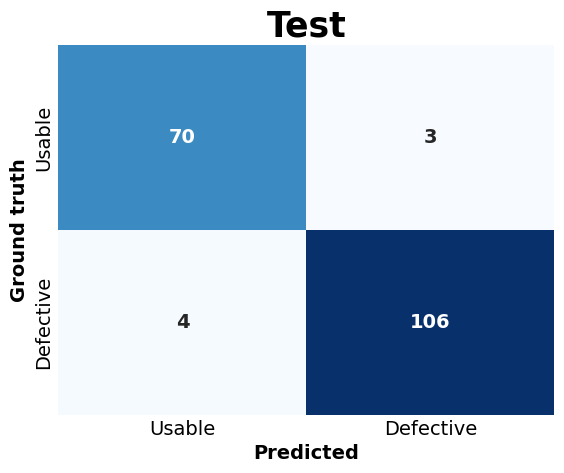

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()